# Isolation Forest



## 0.환경준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest # Isolation Forest!
from sklearn.metrics import *


import warnings
warnings.simplefilter(action='ignore')

## 1.Isolation Forest 개념이해

> sklearn help : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html  
Isolation Forest Original Paper : https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest

### (1) 샘플데이터 가져오기

In [2]:
# Single Blob
X1 = pd.read_csv('Anomaly_X.csv')

# Double Blob
X2 = pd.read_csv('Anomaly_X2.csv')

#### 1) Single Blob

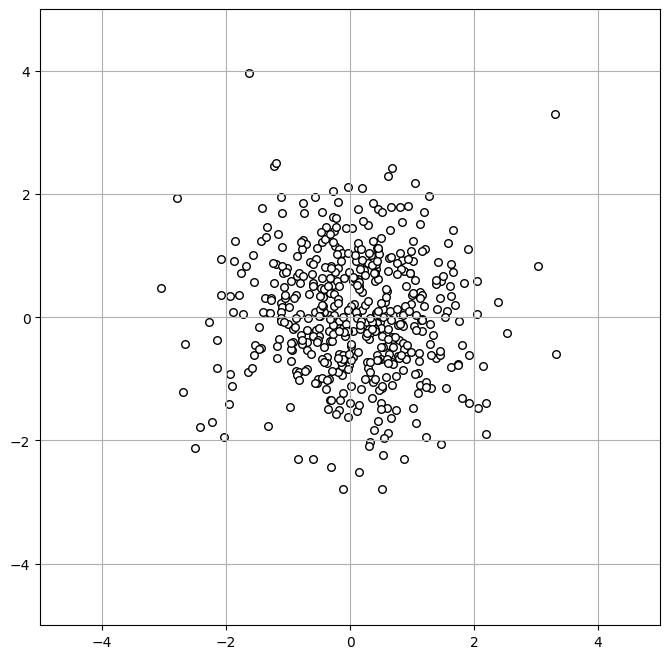

In [3]:
# sample data
plt.figure(figsize = (8,8))

plt.scatter(X1['v1'], X1['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* Isolation Forest 모델을 일단 만들어 봅시다.

In [ ]:
# 모델링
model = IsolationForest(contamination = 0.1, n_estimators = 50 )
# 비지도학습(파라미터가 하나임)
model.fit(X1)
pred = model.predict(X1)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

In [5]:
# 메쉬그리드값 저장하기
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # mesh grid

# 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

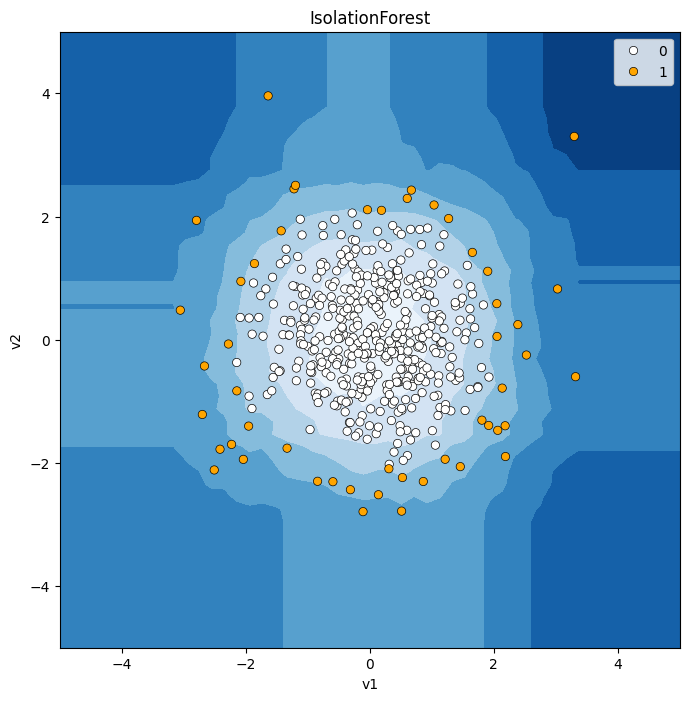

In [6]:
# 시각화
plt.figure(figsize = (8,8))
plt.title("IsolationForest")

# 메쉬그리드 값의 Anomaly Score에 대한 등고선
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(x=X1['v1'], y=X1['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

* 몇가지를 조절해 봅시다.
    * contamination
        * 데이터에서 존재하는 Abnormal 데이터의 비율.
        * Score 계산 후, 이상치로 간주할 비율
    * n_estimators
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

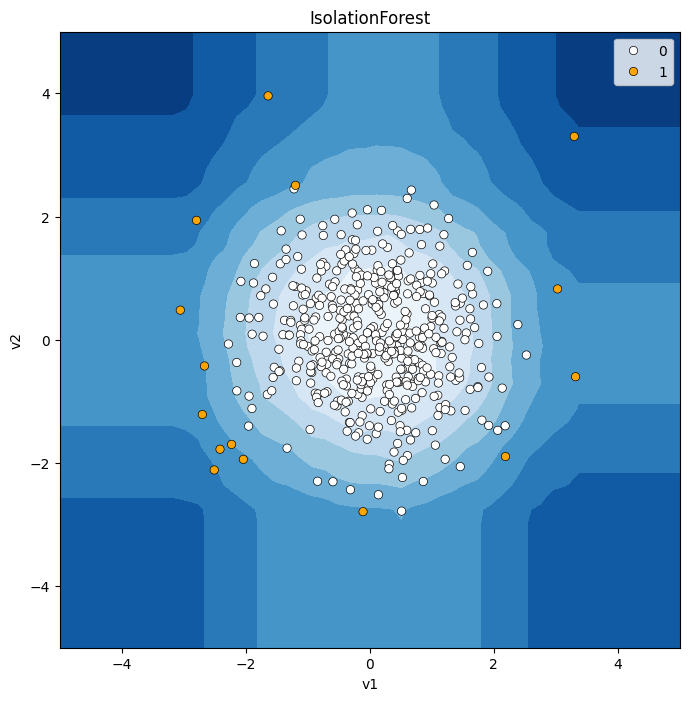

In [7]:
# 여기를 조정해 봅시다.
cont = 0.03
n_est = 300

# 모델링
model = IsolationForest(contamination = cont, n_estimators = n_est
                        , random_state = 2022)
model.fit(X1)
pred = model.predict(X1)
pred = np.where(pred == 1, 0, 1)

# 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize = (8,8))
plt.title("IsolationForest")

# 메쉬그리드 값의 Anomaly Score에 대한 등고선
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(x=X1['v1'], y=X1['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

#### 2) Double Blob

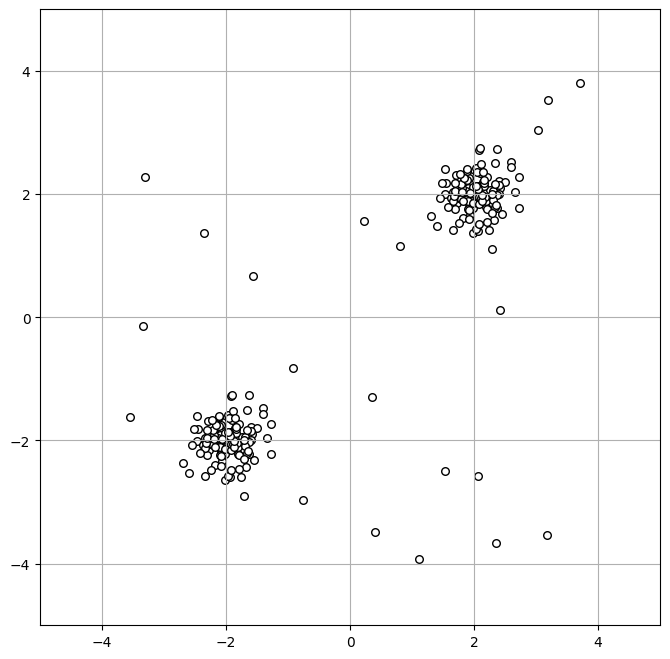

In [8]:
plt.figure(figsize = (8,8))

plt.scatter(X2['v1'], X2['v2'], c="white", s=30, edgecolor="k")

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid()
plt.show()

* Isolation Forest 모델을 일단 만들어 봅시다.

In [9]:
# 모델링
model = IsolationForest(contamination = 0.1, n_estimators = 50 )
model.fit(X2)
pred = model.predict(X2)
pred = np.where(pred == 1, 0, 1)

* 모델을 시각화 해 봅시다.

In [10]:
# 메쉬그리드값 저장하기
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)) # mesh grid

# 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

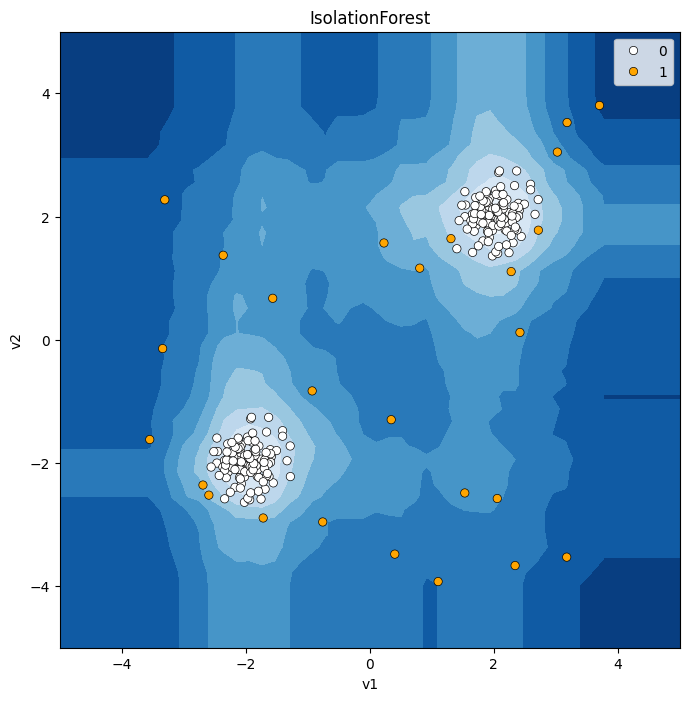

In [11]:
# 시각화
plt.figure(figsize = (8,8))
plt.title("IsolationForest")

# 메쉬그리드 값의 Anomaly Score에 대한 등고선
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(x=X2['v1'], y=X2['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

* 몇가지를 조절해 봅시다.
    * contamination
        * 데이터에서 존재하는 Abnormal 데이터의 비율.
        * Score 계산 후, 이상치로 간주할 비율
    * n_estimators
        * 하나의 데이터를 고립시키기 위해 생성하는 tree의 개수
        * Default : 100

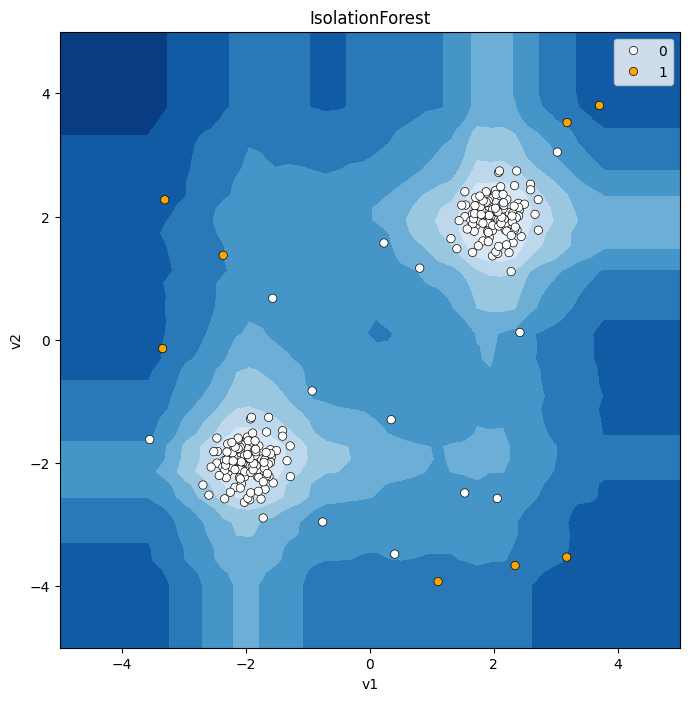

In [12]:
# 여기를 조정해 봅시다.
cont = 0.03
n_est = 100

# 모델링
model = IsolationForest(contamination = cont, n_estimators = n_est
                        , random_state = 2022)
model.fit(X2)
pred = model.predict(X2)
pred = np.where(pred == 1, 0, 1)

# 메쉬 그리드값에 대해 모델 부터 Anomaly Score 만들기.
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Anomaly Score
Z = Z.reshape(xx.shape)

# 시각화
plt.figure(figsize = (8,8))
plt.title("IsolationForest")

# 메쉬그리드 값의 Anomaly Score에 대한 등고선
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# 데이터 산점도 그리기.(예측 결과 Abnormal은 오렌지색, Normal은 흰색)
sns.scatterplot(x=X2['v1'], y=X2['v2'], sizes = 30,edgecolor='k', hue = pred, palette=['white', 'orange'])

plt.axis("tight")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

## 2.직원 이직 여부를 예측해 봅시다.

### (1) 데이터 준비

* 데이터 로딩

In [13]:
# data data
path = "Attrition2.csv"
data = pd.read_csv(path)
data.head()

,Attrition,Age,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,0,28,Research & Development,1,3,Medical,Female,Research Scientist,1,Married,3591,1,3,3,3,3,3
1,1,37,Research & Development,2,2,Other,Male,Laboratory Technician,3,Single,2090,6,2,7,3,3,0
2,0,27,Research & Development,8,5,Life Sciences,Male,Laboratory Technician,3,Married,4621,1,4,3,4,3,3
3,0,18,Research & Development,1,3,Life Sciences,Female,Laboratory Technician,4,Single,1611,1,3,0,5,4,0
4,0,29,Research & Development,9,3,Life Sciences,Male,Research Scientist,3,Married,2451,6,1,5,2,2,1


* x, y 로 나누기

In [14]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

In [15]:
y.value_counts() / y.shape[0]

Attrition
0    0.913043
1    0.086957
Name: count, dtype: float64

* 가변수화


In [16]:
dummy_vars = ['Education','Department','EducationField','Gender','JobRole','JobSatisfaction','MaritalStatus',
              'RelationshipSatisfaction','WorkLifeBalance'] # 가변수화 대상 변수 이름 리스트 만든다
x = pd.get_dummies(x, columns = dummy_vars, drop_first=True)

In [53]:
x

,v021,v087,v088,v089,v114,v115,v116,v117,v118,v120,...,v527,v528,v571,v572,v573,v574,v575,v576,v577,v578
0,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,0.9804,...,0.5064,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509
1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,0.9731,...,0.8832,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003
2,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,0.9772,...,0.6451,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721
3,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,0.9761,...,0.7404,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831
4,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,0.9628,...,2.2181,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1.4072,2.3762,0.9861,1869.4215,0.9520,0.0,727.6761,0.9894,58.3514,0.9636,...,1.2587,2.6649,536.3418,2.0153,7.98,0.2363,2.6401,0.0785,1.4879,11.7256
1563,1.3949,2.4880,0.9911,1872.5133,0.9561,0.0,755.7527,0.9899,57.1020,0.9806,...,0.4512,6.0192,537.9264,2.1814,5.48,0.3891,1.9077,0.1213,1.0187,17.8379
1564,1.4256,2.4590,0.9869,1820.3629,0.9488,0.0,704.2686,0.9891,59.2046,0.9767,...,0.4867,5.4641,530.3709,2.3435,6.49,0.4154,2.1760,0.1352,1.2237,17.7267
1565,1.3868,2.3600,0.9796,1627.4714,0.9485,0.0,605.6190,0.9896,58.2686,0.9805,...,0.3866,6.5512,534.3936,1.9098,9.13,0.3669,3.2524,0.1040,1.7085,19.2104


* 데이터 분할

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state=2022)

In [18]:
x_train.shape, y_train.shape

((805, 38), (805,))

### (2) 모델링

#### 1) 학습

Isolation Forest 모델은 Anomaly Score를 계산합니다.  
**contamination** 값은 그 중 **Abnormal**로 간주할 비율을 의미합니다.


In [19]:
# 데이터에서 Abnormal(1)의 비율은 0.087 입니다.
y.value_counts() / y.shape[0]

Attrition
0    0.913043
1    0.086957
Name: count, dtype: float64

In [20]:
cont = (y_train.value_counts() / len(y_train))[1]
cont

0.0968944099378882

In [21]:
model = IsolationForest(contamination = cont)

# 비지도 학습입니다. x_train만 사용!
model.fit(x_train)

IsolationForest(contamination=0.0968944099378882)

#### 2) Scoring

* .score_samples() :
    * 결과가 -1 ~ 0 까지로, -1에 가까울 수록 이상치
    * 그러나, 원 논문에서는 anomaly score는 0 ~ 1 사이 값으로 1에 가까울 수록 이상치라고 기술되어 있습니다.
    * 그러므로 우리도 비지도학습의 모든 Score를
        * 0에 가까울 수록 Normal
        * 0에서 멀어질 수록 Abnormal로 보도록 합시다.

In [ ]:
# 0에서 멀어지면 이상치로 판단함. 
# 즉 1이든 -1이든 상관없이 0과 멀어지면 이상치로 판단함.
score = model.score_samples(x_train)

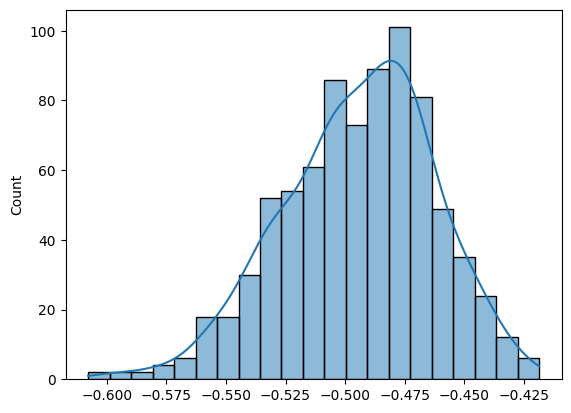

In [23]:
# score의 분포를 보면, -1 ~ 0
sns.histplot(score, kde = True)
plt.show()

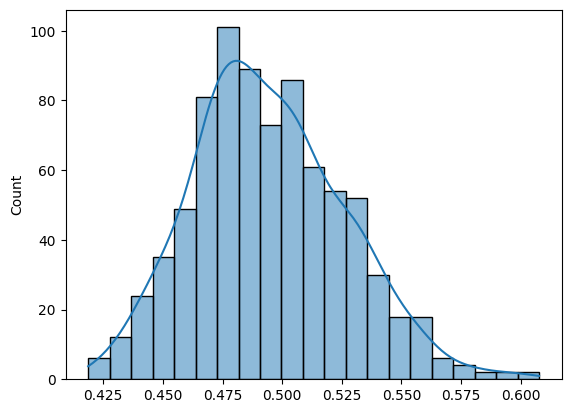

In [24]:
# 그러므로 score에 -1을 곱해주자.
score = -1 * score

sns.histplot(score,     kde = True)
plt.show()

### (3) validation으로 예측하고 평가

* 예측 :
    * predict : scoring 하고 나서 contamination에 지정한 비율로 abnormal 구분
        * abnormal = -1
        * normal = 1
    * score_samples : scoring

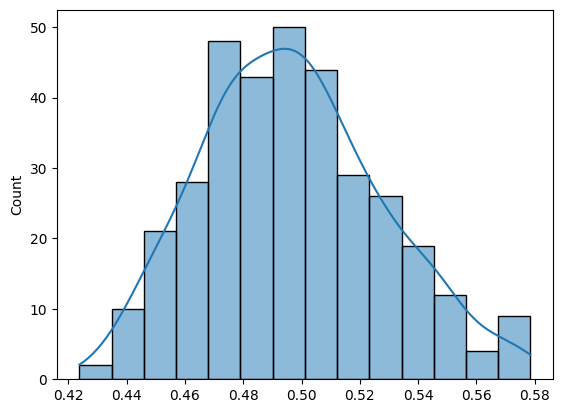

In [25]:
# abnormal 점수 계산
score = model.score_samples(x_val)
score = -1 * score

sns.histplot(score, kde = True)
plt.show()

In [26]:
score.shape

(345,)

In [ ]:
# scoring + 분류 : 중 상위 몇 %(contamination 지정한 비율)를 abnormal로 분류
pred = model.predict(x_val)

In [28]:
# 결과 : Abnormal -1, Normal 1
pred

array([ 1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1

In [29]:
# Abnormal 1, Normal 0 으로 변경합시다.(보통, Abnormal을 1로 표현)
pred = np.where(pred == 1, 0, 1)

In [30]:
pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
# 분류 결과를 평가해 봅시다.
print(confusion_matrix(y_val, pred))
print(classification_report(y_val, pred))

[[286  37]
 [ 20   2]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       323
           1       0.05      0.09      0.07        22

    accuracy                           0.83       345
   macro avg       0.49      0.49      0.49       345
weighted avg       0.88      0.83      0.86       345



* contamination에 지정한 비율과 predict로 예측한 Abnormal 비율 비교

In [32]:
pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
# predict에 의해 Abnormal로 예측된 비율
# Abnormal이 1 이므로 그냥 sum() 하면 됨.
sum(pred) / len(pred)

0.11304347826086956

In [34]:
# Contamination 지정 비율
cont

0.0968944099378882

### (4) cut-off (normal : abnormal)value를 조절해가며 지표 계산 및 그래프 그리기

* prec_rec_f1_curve 함수 만들기
    * sklearn에서는 precision, recall curve만 제공됩니다.
    * 그래서, f1 curve도 추가해서 구하고, plot을 그립니다.

In [35]:
score.shape, y_val.shape

((345,), (345,))

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def prec_rec_f1_curve(y, score, pos = 1) :
    precision, recall, thresholds  = precision_recall_curve(y, score, pos_label=1)
    f1 = 2 / (1/precision + 1/recall)

    # f1, recall, precision curve
    plt.plot(thresholds, np.delete(precision, -1), label = 'precision')
    plt.plot(thresholds, np.delete(recall, -1), label = 'recall')
    plt.plot(thresholds, np.delete(f1, -1), label = 'f1')

    # f1를 최대화 해주는 threshold
    thre = round(thresholds[np.argmax(f1)],4)
    f1s = round(max(f1),4)
    plt.axvline(thre , color = 'darkred', linewidth = .7)
    plt.axhline( f1s, color = 'darkred', linewidth = .7)
    plt.text(thre, .5, thre, color = 'darkred')
    plt.text(min(thresholds), f1s, f1s, color = 'darkred')

    plt.xlabel('Anomaly Score')
    plt.ylabel('Performance')
    plt.legend()
    plt.grid()
    plt.show()

    return precision, recall, f1, thresholds

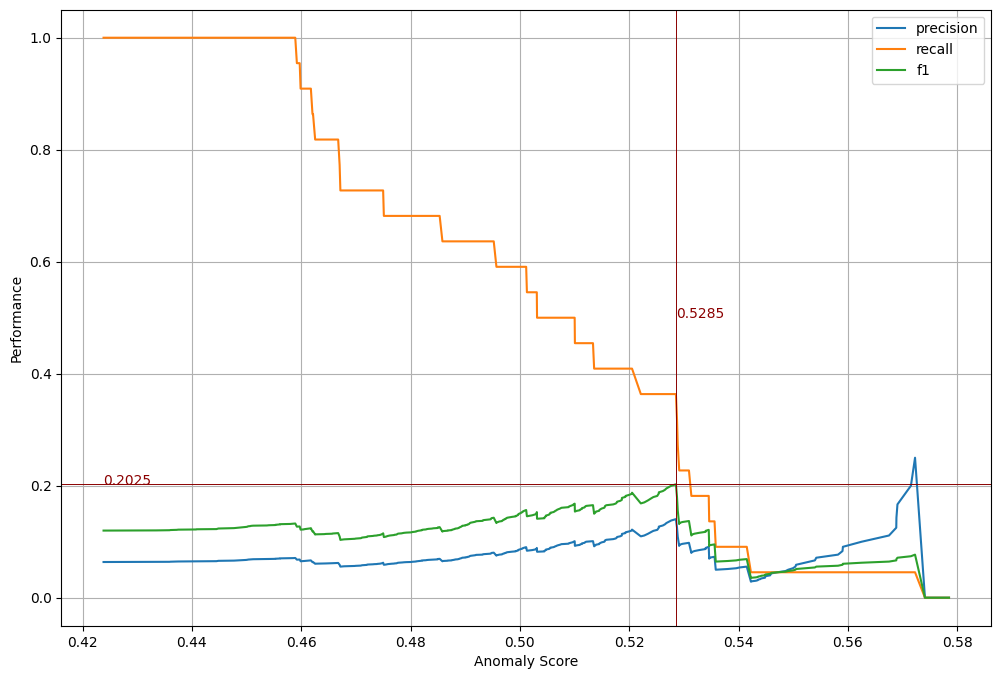

In [37]:
plt.figure(figsize = (12,8))
precision, recall, f1, thresholds = prec_rec_f1_curve(y_val, score)

### (5) 하이퍼파리미터 조정
* 한꺼번에 튜닝할 수도 있지만, 여기서는 하이퍼파리미터 하나씩 조정하며 경향을 파악하고자 합니다.
* 직접 for 구문을 이용하여 튜닝해보는 것은, 하이퍼파리미터의 조정에 따른 성능 추세를 파악는데 반드시 필요합니다.
    * n_estimators : scoring 하기 위해 만드는 iTree 수. default = 100(이정도면 충분하다고 알려져 있다.
    * max_samples : 학습용 데이터에서 임의로 샘플링 해서 iTree 만듬.


* n_estimators

In [38]:
params = range(10,201,10)
f1 = []
for t in params :
    model = IsolationForest(contamination=0.087, n_estimators=t, random_state=2022)
    model.fit(x_train.values)
    pred = model.predict(x_val.values)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label=1))

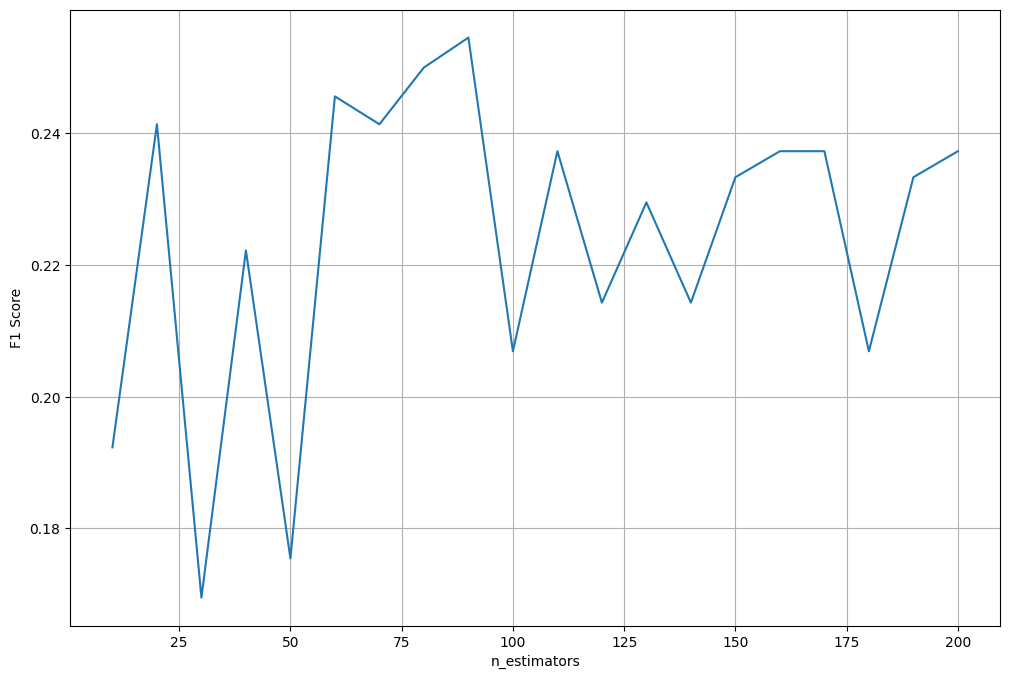

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.ylabel('F1 Score')
plt.xlabel('n_estimators')
plt.grid()
plt.show()

* max_samples

In [40]:
x_train.shape

(805, 38)

In [41]:
# 완전트리를 만들었을 때의 갯수 (n^2)
samples = [2**n for n in range(5, 11)]
samples

[32, 64, 128, 256, 512, 1024]

In [42]:
f1 = []

for n in samples :
    model = IsolationForest(contamination= .087, max_samples= n, random_state= 2021 )
    model.fit(x_train.values)
    pred = model.predict(x_val.values)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label=1))

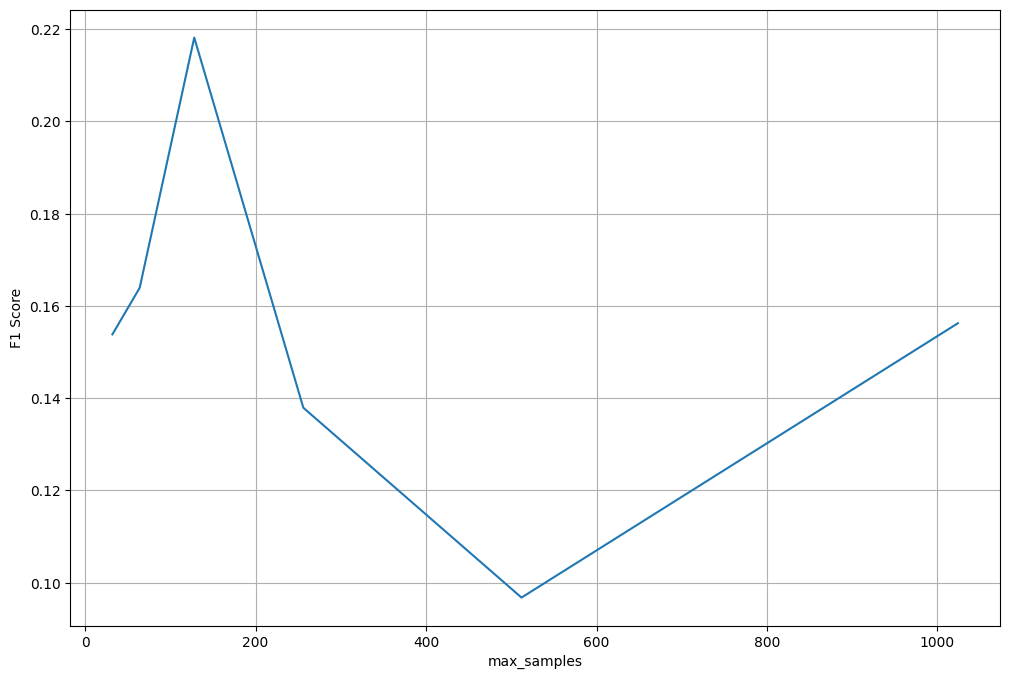

In [43]:
plt.figure(figsize=(12, 8))
plt.plot(samples, f1)
plt.ylabel('F1 Score')
plt.xlabel('max_samples')
plt.grid()
plt.show()

### (6) 튜닝 결론

* n_estimators 기본값 100 정도면 충분
* max_samples 기본값 256 정도면 충분 (약간 조정해볼 필요는 있음)
* max_depth는 $log_2$[max_samples] 로 결정됨.
* contamination은 전체중 이상치 비율을 정해주는 것인데, 가능하면 score_samples 함수로 계산후 평가하는 것이 더 나은 방법이라고 판단됨.

## 3.실습 : Semiconductor manufacturing process dataset


![](https://assets.pandaily.com/uploads/2021/10/semiconductor.png)

* 반도체 제조 공정은 시점별로 수많은 센서로부터 정보를 수집하여 공정을 감시합니다.
* 센서정보와 함께 공정간 발생된 불량품에 대한 정보를 저장하였습니다.
* 불량을 예측해 봅시다.

### (1) 데이터 준비

* 데이터 로딩

In [46]:
path = "secom_9.csv"
data = pd.read_csv(path)

data['label'] = 0
data.loc[data['defeat']== 'defeat', 'label']= 1
data.drop(['datetime','defeat'], axis = 1, inplace=True)
data.head()

,v021,v087,v088,v089,v114,v115,v116,v117,v118,v120,...,v528,v571,v572,v573,v574,v575,v576,v577,v578,label
0,1.4026,2.3895,0.9690,1747.6049,0.9460,0.0,748.6115,0.9908,58.4306,0.9804,...,6.6926,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0
1,1.3825,2.3754,0.9894,1931.6464,0.9425,0.0,731.2517,0.9902,58.6680,0.9731,...,8.8370,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0
2,1.4123,2.4532,0.9880,1685.8514,0.9231,0.0,718.5777,0.9899,58.4808,0.9772,...,6.4568,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,1
3,1.4011,2.4004,0.9904,1752.0968,0.9564,0.0,709.0867,0.9906,58.6635,0.9761,...,6.4865,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0
4,1.3888,2.4530,0.9902,1828.3846,0.9424,0.0,796.5950,0.9908,58.3858,0.9628,...,6.3745,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0


변수 정보
* label : 1 - 불량, 0 - 정상
* v### : 센서값들


In [47]:
target = 'label'

In [48]:
data[target].value_counts() / data.shape[0]

label
0    0.933631
1    0.066369
Name: count, dtype: float64

* x, y로 나누기

In [49]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화 Dummy Variable

* 데이터 분할
    * 이미 test set은 분할되어 있다고 가정합니다.
    * 주어진 데이터를 train set : validation set 으로 분할

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# train_val에서 train : val = 8 : 2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 2022)

In [52]:
print(x_train.shape, x_val.shape)

(1253, 52) (314, 52)


### (2) 기본모델링
> * contamination 만 train셋 y의 비율로 지정하여 학습하시오.
* score 점수를 뽑고 분포를 살펴보시오.
* validation 셋으로 예측을 하고, 평가해 봅시다.
* score 점수를 이용하여, 수동으로 cut-off 조절해가며 지표 계산 및 그래프를 그려 봅시다.

In [58]:
y.value_counts() / y.shape[0]

label
0    0.933631
1    0.066369
Name: count, dtype: float64

In [59]:
cont = (y_train.value_counts() / len(y_train))[1]
cont

0.06863527533918595

In [69]:
model = IsolationForest(contamination=cont)
model.fit(x_train)

IsolationForest(contamination=0.06863527533918595)

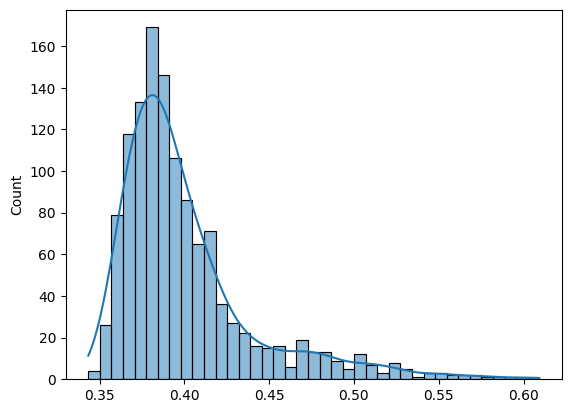

In [70]:
score = model.score_samples(x_train)


score = -1 * score


sns.histplot(score, kde=True)
plt.show()


* 예측

In [71]:
pred = model.predict(x_val)
pred = np.where(pred==1, 0, 1)

In [72]:
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

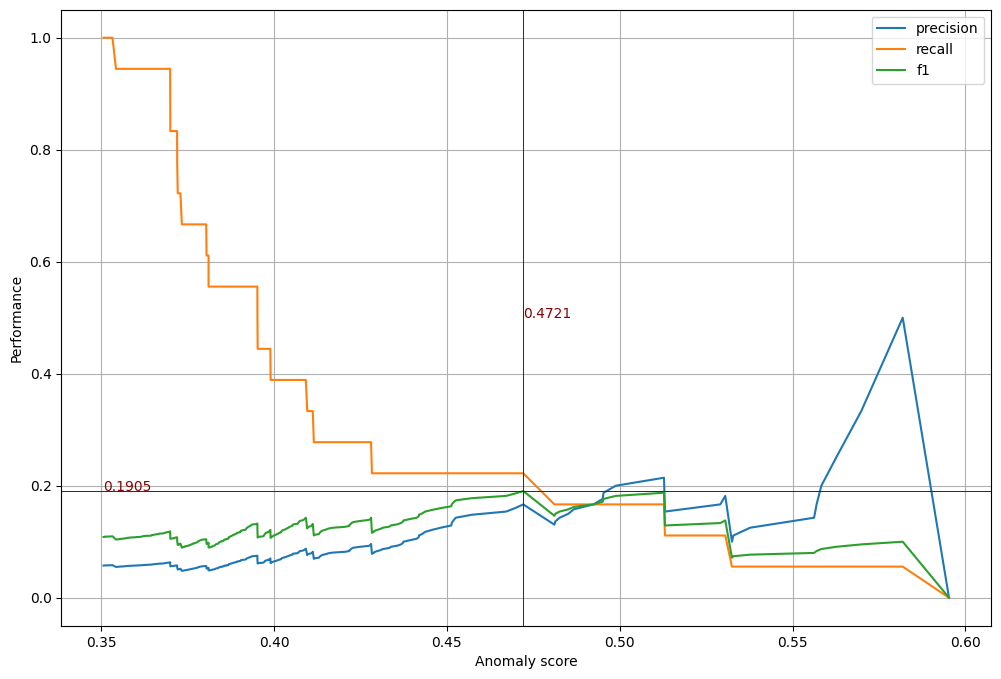

In [ ]:
def prec_rec_f1_curve(y, score, pos = 1) :
    precision, recall, thresholds = precision_recall_curve(y, score, pos_label=1)
    f1 = 2 / (1 / precision + 1 / recall)

    plt.plot(thresholds, np.delete(precision, -1), label='precision')
    plt.plot(thresholds, np.delete(recall, -1), label='recall')
    plt.plot(thresholds, np.delete(f1, -1), label='f1')

    thre = round(thresholds[np.argmax(f1)], 4)
    f1s = round(max(f1), 4) 
    plt.axvline(thre, color = 'darkred', linewidth = .7)
    plt.axhline(f1s, color = 'darkred', linewidth = .7)
    plt.text(thre, .5, thre, color = 'darkred')
    plt.text(min(thresholds), f1s, f1s, color = 'darkred')

    plt.xlabel('Anomaly score')
    plt.ylabel('Performance')
    plt.legend()
    plt.grid()
    plt.show()

    return precision, recall, f1, thresholds

score_val = model.score_samples(x_val)
score_val = -1 * score_val

plt.figure(figsize=(12, 8))
precision, recall, f1, thresholds = prec_rec_f1_curve(y_val, score_val)

In [81]:
import numpy as np

# Set print options to display the full array
np.set_printoptions(threshold=np.inf)

print(score)

# Reset print options to default (optional)
np.set_printoptions(threshold=1000)

[0.39149322 0.46653073 0.38967769 0.38503285 0.37432464 0.38081849
 0.36819586 0.37554971 0.38879626 0.47594539 0.39207177 0.390043
 0.40566407 0.39048639 0.35659097 0.42204152 0.39034632 0.41660164
 0.37793989 0.37565177 0.37147722 0.35626785 0.39438406 0.39523968
 0.52461822 0.38152196 0.50590715 0.36835066 0.40792235 0.38032802
 0.40053471 0.38175133 0.50579624 0.39397732 0.39757121 0.46465845
 0.52246316 0.40621571 0.36806188 0.3793748  0.34825405 0.41655175
 0.44193112 0.38522019 0.37884937 0.39784086 0.38813217 0.42379671
 0.502011   0.42832326 0.38344406 0.4514615  0.37015897 0.37846298
 0.38892872 0.37275741 0.40657713 0.35755226 0.36863744 0.38169176
 0.40359822 0.41404472 0.37305484 0.36677619 0.41363449 0.37511384
 0.36480932 0.3619284  0.38226192 0.34804374 0.39656555 0.35295213
 0.42662117 0.41272541 0.37074696 0.35871631 0.37891805 0.40708775
 0.39439907 0.35942597 0.37575778 0.38821106 0.37197074 0.36846084
 0.37809176 0.36388622 0.40582228 0.40544399 0.42795291 0.417559

### (3) 주요 파라미터 튜닝
> * 다음의 하이퍼파라미터를 각각 조절하며, f1 스코어를 구하고, 경향과, 적절한 지점을 파악해 봅시다.
    * n_estimators
    * max_samples

#### 1) n_estimators

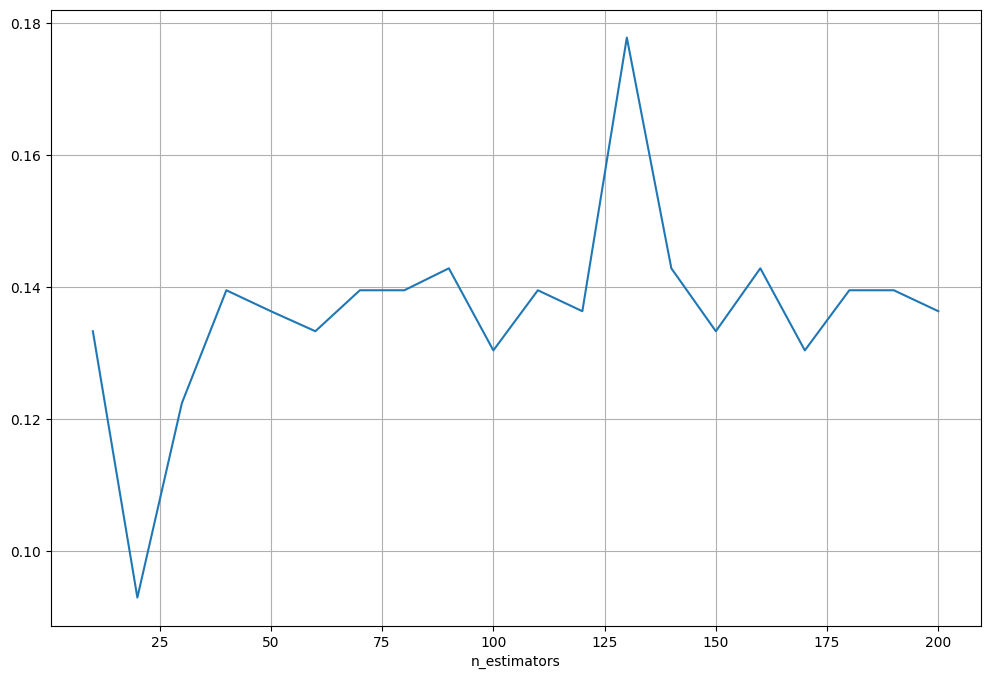

In [82]:
params = range(10, 201, 10)
f1 = []
for t in params : 
    model = IsolationForest(contamination=0.087, n_estimators=t)
    model.fit(x_train.values)   
    pred = model.predict(x_val.values)
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label=1))

plt.figure(figsize=(12, 8))
plt.plot(params, f1)
plt.xlabel('F1 Score')
plt.xlabel('n_estimators')
plt.grid()
plt.show()

#### 2) max_samples

In [83]:
samples = [2**n for n in range(5, 11)]

f1 = []

for n in samples:
    model = IsolationForest(contamination=0.087, max_samples=n, random_state=2021)
    model.fit(x_train.values)   
    pred = model.predict(x_val.values)  
    pred = np.where(pred == 1, 0, 1)
    f1.append(f1_score(y_val, pred, pos_label=1))

    

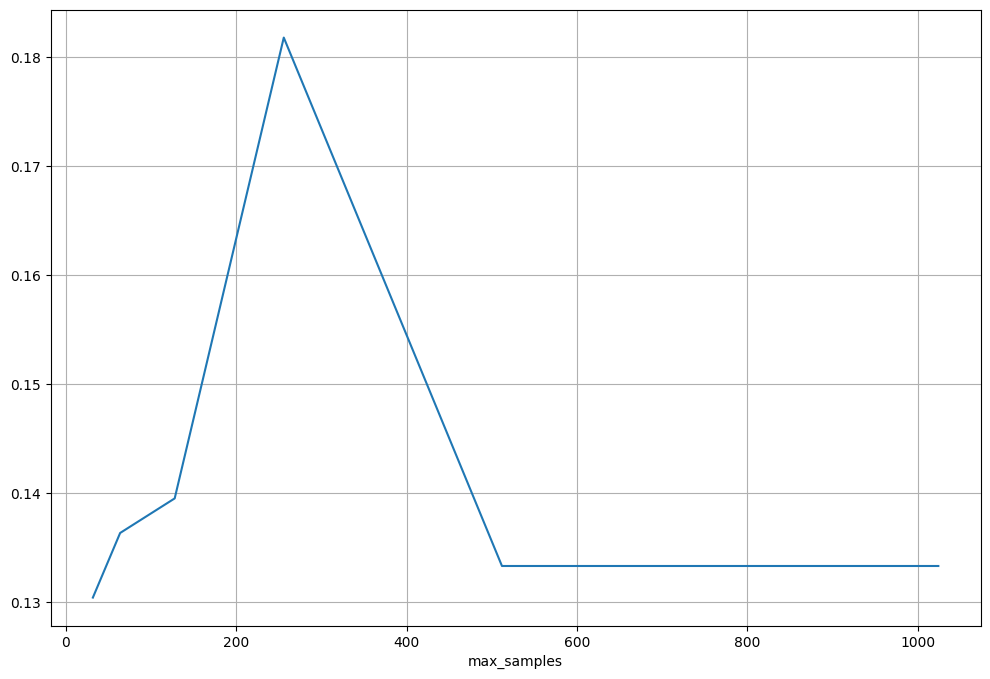

In [84]:
plt.figure(figsize=(12, 8))
plt.plot(samples, f1)
plt.xlabel('F1 score')
plt.xlabel('max_samples')
plt.grid()
plt.show()